<a href="https://colab.research.google.com/github/sanahashmat/Image-Video-processing/blob/main/Bitplaneimg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

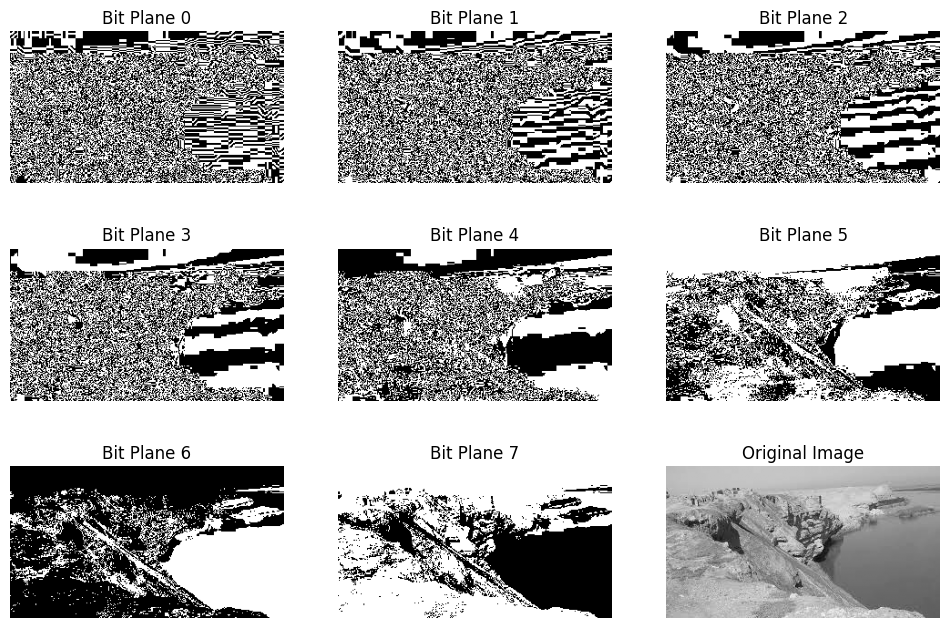

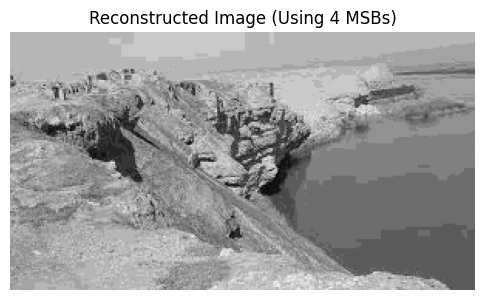

In [1]:
#Decompose the given img into its bit planes & reconstruct it back

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read uploaded image in grayscale
img = cv2.imread("/content/mountain.jpg", 0)

# Bit-plane slicing
bit_planes = []
for i in range(8):
    bit_plane = np.bitwise_and(img, 2**i)
    bit_plane = bit_plane >> i   # Normalize to 0 or 1
    bit_planes.append(bit_plane)

# Display bit-planes
plt.figure(figsize=(12,8))

for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f"Bit Plane {i}")
    plt.axis("off")

plt.subplot(3,3,9)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.show()

# Reconstruct image using MSB bit-planes (4 MSBs)
reconstructed = np.zeros_like(img)

for i in range(4, 8):   # Using bit-planes 4 to 7
    reconstructed += (bit_planes[i] << i)

# Display reconstruction
plt.figure(figsize=(6,4))
plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed Image (Using 4 MSBs)")
plt.axis("off")
plt.show()
